## **Introdução ao Algoritmo KMeans**

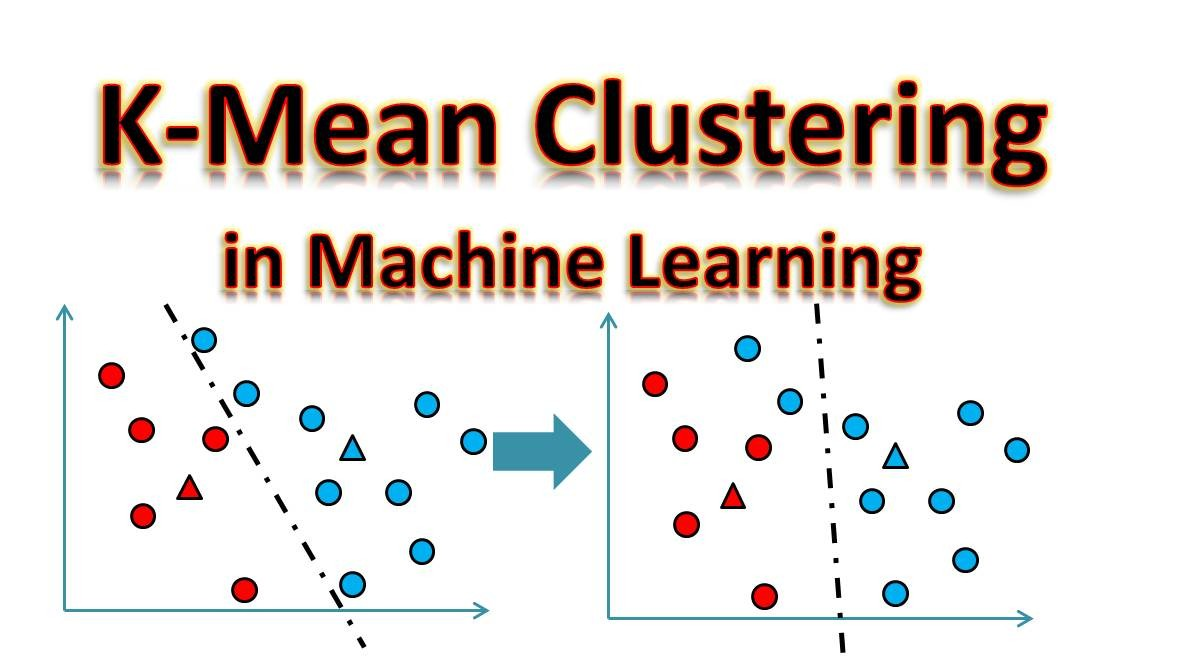

O algoritmo K-Means é uma técnica de análise de dados e aprendizado de máquina usada para agrupar automaticamente pontos de dados semelhantes em grupos distintos, chamados de "clusters". É uma das técnicas de clustering mais amplamente utilizadas e uma introdução importante para quem deseja compreender o mundo do aprendizado de máquina e da análise de dados.

Trata-se do primeiro e mais simples algoritmo baseado em distâncias. No entanto, ele possui suas vantagens e desvantagens.

**Vantagens**:

1. **Simplicidade**: O K-Means é fácil de entender e implementar. Ele é um dos algoritmos de clustering mais simples e eficazes.

2. **Eficiência no Treinamento**: É computacionalmente eficiente, o que o torna adequado para grandes conjuntos de dados.

3. **Escalabilidade**: O algoritmo funciona bem com grandes conjuntos de dados.

4. **Amplamente utilizado**: O K-Means é uma técnica comum e bem estabelecida, amplamente utilizada em muitas aplicações e setores.

**Desvantagens**:

1. **Dependência da inicialização**: Os resultados do K-Means dependem da escolha inicial dos centros dos clusters. Diferentes inicializações podem levar a soluções diferentes.

2. **Sensível à escolha de K**: A escolha do número de clusters, K, não é trivial e pode afetar significativamente os resultados.

3. **Assume clusters de forma esférica**: O K-Means assume que os clusters são convexos e de forma esférica, o que pode ser uma limitação em dados com estruturas mais complexas.

4. **Sensível à escala**: O K-Means é sensível à escala dos dados, o que significa que a unidade de medida dos atributos pode afetar os resultados.

5. **Outliers afetam o resultado**: Outliers podem distorcer significativamente os clusters, tornando o K-Means sensível a dados atípicos.

6. **Sensível à alta dimensionalidade**: em altas dimensionalidades, a esparsidade dos dados faz com que o algoritmo tenha dificuldades em diferenciar *clusters* pela distância.

É importante reconhecer que o K-Means não é apropriado para todos os tipos de dados e aplicações. Antes de usá-lo, é essencial considerar as vantagens e desvantagens em relação ao seu caso de uso específico e às características dos seus dados.

## **Passos para o Algoritmo**

Os passos do algoritmo K-Means são:

1. **Inicialização**: Escolha aleatoriamente K centros iniciais (onde K é o número de clusters desejado) ou defina os centros iniciais de alguma outra maneira.

2. **Atribuição de Pontos aos Clusters (Etapas E)**: Atribua cada ponto de dados ao cluster cujo centro está mais próximo, geralmente com base na distância Euclidiana.

3. **Atualização dos Centros dos Clusters (Etapas M)**: Recalcule os centros dos clusters, que são a média dos pontos de dados atribuídos a cada cluster.

4. **Verificação de Convergência**: Verifique se os centros dos clusters mudaram significativamente desde a última iteração. Se não, o algoritmo converge e termina.

5. **Repetição**: Repita as etapas 2 a 4 até que os centros dos clusters se estabilizem ou até que um número máximo de iterações seja atingido.


## **Métodos de Seleção do Número de Agrupamentos**

Selecionar o número ideal de clusters (K) é uma etapa crítica ao aplicar o algoritmo K-Means, e existem vários métodos para fazer essa seleção. Aqui estão alguns dos métodos mais comuns para determinar o número adequado de clusters:

1. **Método do Cotovelo (Elbow Method)**:
   - O método do cotovelo é um dos métodos mais populares para selecionar K. Ele envolve a execução do K-Means com diferentes valores de K e o cálculo do WCSS (Within-Cluster Sum of Squares) para cada valor de K.
   - O WCSS mede a variação dentro dos clusters. O objetivo é encontrar o ponto no gráfico WCSS versus K onde a diminuição na WCSS começa a nivelar. Esse ponto é chamado de "cotovelo".
   - O valor de K no cotovelo é frequentemente escolhido como o número de clusters.

2. **Método da Silhueta (Silhouette Method)**:
   - O método da silhueta avalia a qualidade dos clusters formados para diferentes valores de K. Ele calcula a silhueta média para cada valor de K.
   - A silhueta mede o quão bem os pontos de um cluster estão próximos uns dos outros em comparação com o quão bem eles estão separados de pontos de outros clusters. Um valor mais alto de silhueta indica clusters mais coesos.
   - Escolhe-se o valor de K que maximiza a silhueta média.

3. **Método Gap Statistics**:
   - O método Gap Statistics compara a WCSS dos clusters formados com os dados reais com a WCSS de clusters gerados aleatoriamente.
   - Ele calcula o "gap" entre os resultados do K-Means real e os resultados esperados aleatoriamente para diferentes valores de K.
   - O valor de K com o maior "gap" é considerado o número de clusters ideal.

4. **Validação Externa**:
   - Em alguns casos, a escolha de K pode ser guiada por critérios externos ou conhecimento especializado. Por exemplo, em tarefas de segmentação de clientes, você pode escolher K com base em metas de negócios específicas.

6. **Visualização Gráfica**:
   - Às vezes, a visualização dos dados e dos clusters formados para diferentes valores de K pode ajudar a identificar o número ideal de clusters de maneira intuitiva.

É importante notar que a escolha de K não é sempre óbvia, e diferentes métodos podem produzir resultados ligeiramente diferentes. Portanto, é aconselhável considerar vários métodos e usar o bom senso ao escolher o número de clusters que faz mais sentido para o seu problema específico e seus objetivos de análise.

In [30]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler


# ignorar warnings
warnings.filterwarnings('ignore')

In [2]:
# montar o drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# procurar e carregar o arquivo
FILE_PATH = '/content/drive/MyDrive/Bootcamp_DataScience/AlgoritmosInteligenciaArtificialClusterizacao/datasets'
data = pd.read_csv(os.path.join(FILE_PATH, 'Mall_Customers.csv'))
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# eliminar colunas inúteis
data.drop(columns='CustomerID', inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
# modificar os nomes das colunas
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.head(1)

,gender,age,annual_income_(k$),spending_score_(1-100)
0,Male,19,15,39


In [6]:
# analisando o tamanho dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  200 non-null    object
 1   age                     200 non-null    int64 
 2   annual_income_(k$)      200 non-null    int64 
 3   spending_score_(1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


- sem linhas nulas
- tipos de dados OK

In [7]:
# analisando estatísticas descritivas
data.describe()

,age,annual_income_(k$),spending_score_(1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


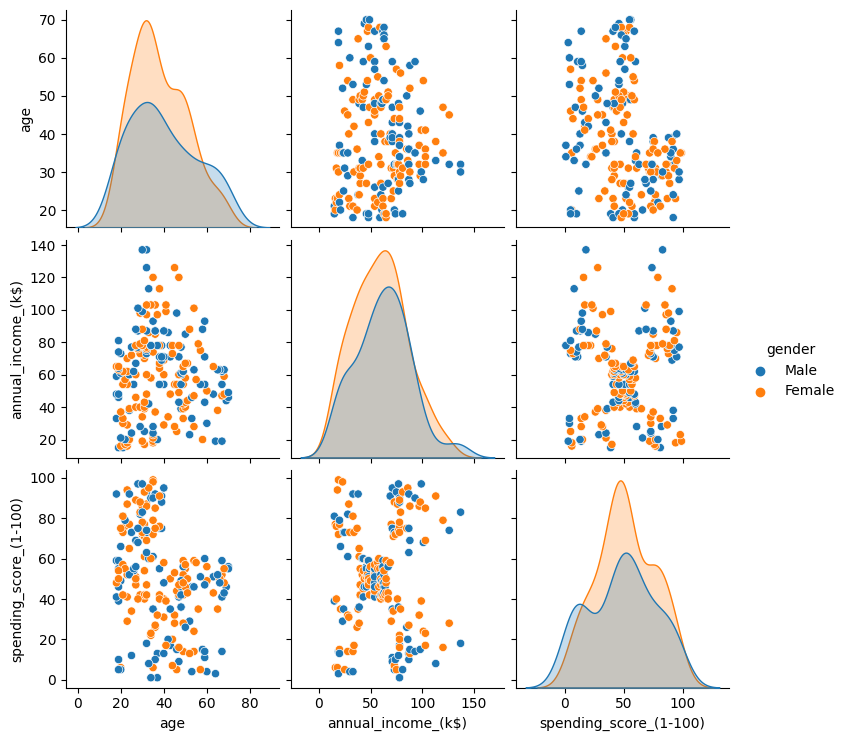

In [8]:
# análise exploratória
sns.pairplot(data, hue='gender')
plt.show()

- aparentemente, o Gênero não ajuda a identificar segmentos de clientes.
- pode existir relações de segmentação para as variáveis age, annual_income e spending_score

In [9]:
# selecionando as variáveis
x = data[['age', 'annual_income_(k$)', 'spending_score_(1-100)']]
x.head()

,age,annual_income_(k$),spending_score_(1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### Como selecionar o k? (Prático)

- Método do Cotovelo

In [10]:
# criar o vetor de ks que vamos testar
n_clusters = range(1, 21)

In [11]:
# método do cotovelo
wcss = []
for k in n_clusters:
  # criando o pipeline de modelagem
  kmeans_test = Pipeline([
      ('scaler', RobustScaler()),
      ('kmeans', KMeans(n_clusters=k, init='k-means++', random_state=2))
  ])

  # ajustar o modelo
  kmeans_test.fit(x)

  # extraindo WCSS
  wcss.append(kmeans_test['kmeans'].inertia_)

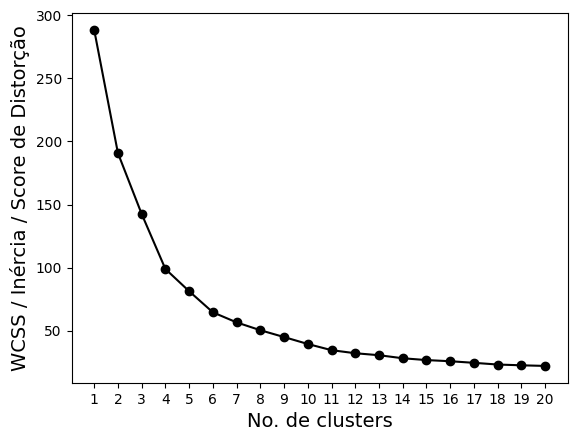

In [12]:
# construir o gráfico do cotovelo
plt.plot(n_clusters, wcss, 'ko-')
plt.xlabel('No. de clusters', size=14)
plt.ylabel('WCSS / Inércia / Score de Distorção', size=14)
plt.xticks(ticks=n_clusters, labels=n_clusters)
plt.show()

- Método da Silhueta

In [16]:
# método da silhueta
s_score = []
n_clusters = range(2, 21)

for k in n_clusters:

  # criando o pipeline de modelagem
  kmeans_test = Pipeline([
      ('scaler', RobustScaler()),
      ('kmeans', KMeans(n_clusters=k, init='k-means++', random_state=2))
  ])

  # ajustar o modelo
  kmeans_test.fit(x)

  # avaliar para qual cada ponto foi atribuído
  cluster_labels = kmeans_test.predict(x)

  # armazenar o score de silhueta
  s_score.append(silhouette_score(X=x, labels=cluster_labels))

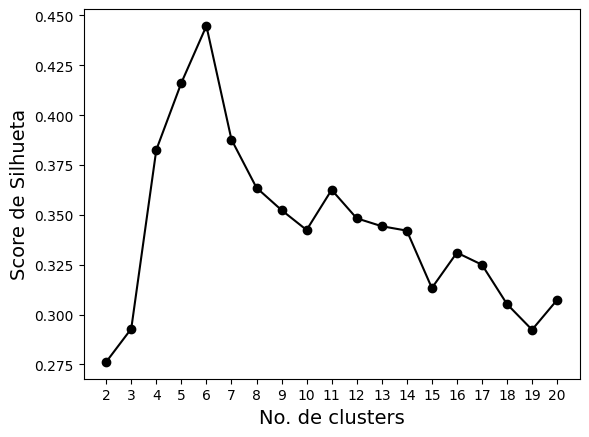

In [17]:
# construir o gráfico do score de silhueta
plt.plot(n_clusters, s_score, 'ko-')
plt.xlabel('No. de clusters', size=14)
plt.ylabel('Score de Silhueta', size=14)
plt.xticks(ticks=n_clusters, labels=n_clusters)
plt.show()

- Método do Gap Statistics

In [21]:
# método do gap statistics
wcss_real = []
wcss_ref = []
n_clusters = range(1, 21)

# calculando o WCSS para dados reais
for k in n_clusters:

  # criando o pipeline de modelagem
  kmeans_test = Pipeline([
      ('scaler', RobustScaler()),
      ('kmeans', KMeans(n_clusters=k, init='k-means++', random_state=2))
  ])

  # ajustar o modelo
  kmeans_test.fit(x)

  # extraindo WCSS
  wcss_real.append(np.log(kmeans_test['kmeans'].inertia_))

In [22]:
# gerar os dados de referência (clusters aleatórios)
ref_x = np.random.rand(x.shape[0], x.shape[1])

# calculando o WCSS para dados reais
for k in n_clusters:

  # criando o pipeline de modelagem
  kmeans_test = Pipeline([
      ('scaler', RobustScaler()),
      ('kmeans', KMeans(n_clusters=k, init='k-means++', random_state=2))
  ])

  # ajustar o modelo
  kmeans_test.fit(ref_x)

  # extraindo WCSS
  wcss_ref.append(np.log(kmeans_test['kmeans'].inertia_))

In [23]:
# calcular o Gap Statistics
gap = np.subtract(wcss_ref, wcss_real)

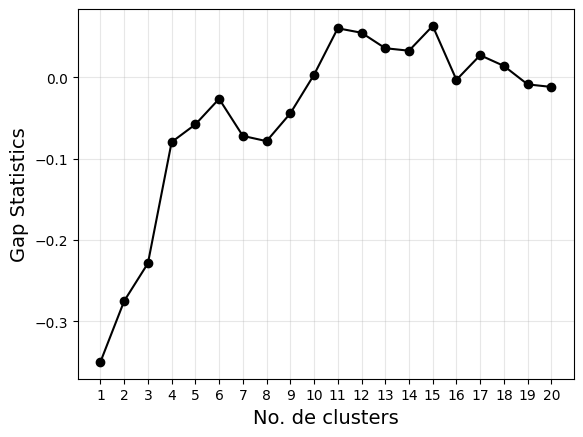

In [25]:
# construir o gráfico do gap statistics
plt.plot(n_clusters, gap, 'ko-')
plt.xlabel('No. de clusters', size=14)
plt.ylabel('Gap Statistics', size=14)
plt.xticks(ticks=n_clusters, labels=n_clusters)
plt.grid(alpha=0.3)
plt.show()

In [26]:
# definição de k
K_FINAL = 6

# criando o pipeline de modelagem
kmeans_final = Pipeline([
    ('scaler', RobustScaler()),
    ('kmeans', KMeans(n_clusters=K_FINAL, init='k-means++', random_state=2))
])

# ajustar o modelo
kmeans_final.fit(x)

# atribuir pontos às classes
data = x.copy()
data['cluster'] = kmeans_final.predict(x)

In [27]:
# analisar estatísticas agrupadas
data.groupby(['cluster']).agg(func=[np.mean, np.std, np.median])

age                   annual_income_(k$)                    \
              mean        std median               mean        std median   
cluster                                                                     
0        42.625000   9.536856   43.0          89.437500  16.599529   86.5   
1        45.523810  11.766984   46.0          26.285714   7.437357   25.0   
2        25.250000   5.326309   23.5          25.833333   8.057762   24.5   
3        32.692308   3.728650   32.0          86.538462  16.312485   79.0   
4        56.333333   8.453079   54.0          54.266667   8.975725   54.0   
5        26.512821   7.104008   26.0          57.974359  10.024935   60.0   

        spending_score_(1-100)                    
                          mean        std median  
cluster                                           
0                    17.343750   9.881914   16.0  
1                    19.380952  12.555780   15.0  
2                    76.916667  13.416138   76.5  
3                    82.128205   9.364489   83.0  
4                    49.066667   6.300794   49.0  
5                    46.692308  11.907879   49.0

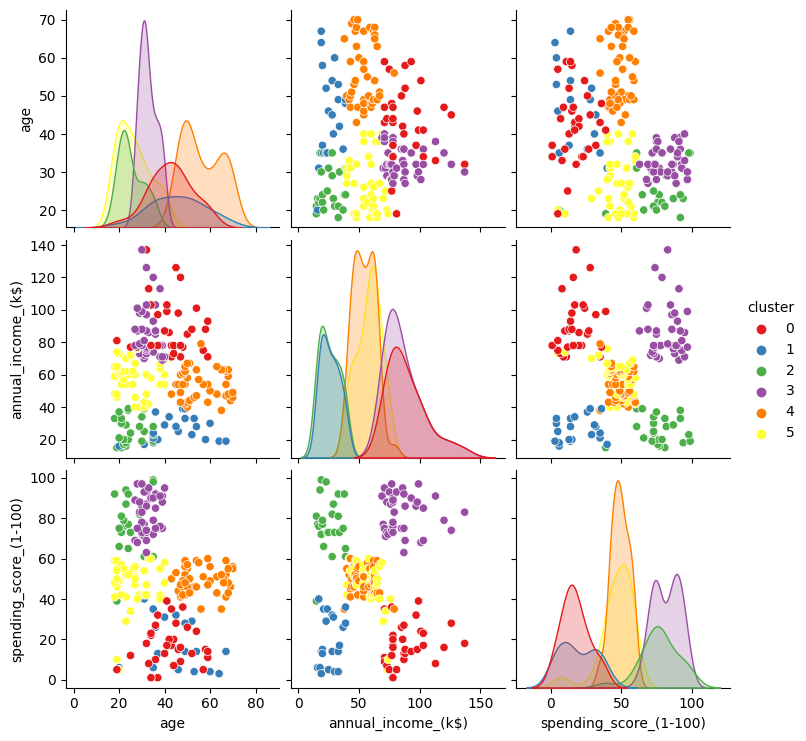

In [29]:
# analisando de forma gráfica
sns.pairplot(data, hue='cluster', palette='Set1')
plt.show()

In [31]:
# tentando visualizar todas as diferenças
fig = px.scatter_3d(data, x='annual_income_(k$)', y='spending_score_(1-100)',
                    z='age', color='cluster', size='cluster')
fig.show()